In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
copacabana = pd.read_csv('copacabana.csv', delimiter=';')

In [5]:
copacabana.head()

,Posicao,Quartos,Vagas,DistIpanema,DistPraia,DistFavela,RendaMedia,RendaMovel,RendaMovelRua,Vu2009,Mes,Idade,Tipologia,AreaConstruida,VAL_UNIT,X,Y
0,1,3.0,0.01,1144,311,146,969501,1028834,999168,1750,509,37.0,1,95,4379,685365.0700,7457802.680
1,0,2.0,0.01,2456,502,254,1472861,1137759,1305310,2300,484,30.0,1,71,6479,685941.5500,7459001.320
2,0,2.0,0.01,2448,772,229,1803724,1512475,1658100,2350,920,44.0,1,58,12414,685627.3900,7459080.520
3,0,2.0,0.01,1615,428,310,1124331,1370600,1247466,2200,930,43.0,1,88,11250,685438.2001,7458268.280
4,0,2.0,1.00,2358,586,287,1165764,1177933,1171849,2150,918,42.0,1,68,13382,685764.3840,7458954.513


In [6]:
del copacabana['RendaMedia']
del copacabana['RendaMovel']
del copacabana['DistIpanema']
del copacabana['RendaMovelRua']

In [7]:
copacabana.head()

,Posicao,Quartos,Vagas,DistPraia,DistFavela,Vu2009,Mes,Idade,Tipologia,AreaConstruida,VAL_UNIT,X,Y
0,1,3.0,0.01,311,146,1750,509,37.0,1,95,4379,685365.0700,7457802.680
1,0,2.0,0.01,502,254,2300,484,30.0,1,71,6479,685941.5500,7459001.320
2,0,2.0,0.01,772,229,2350,920,44.0,1,58,12414,685627.3900,7459080.520
3,0,2.0,0.01,428,310,2200,930,43.0,1,88,11250,685438.2001,7458268.280
4,0,2.0,1.00,586,287,2150,918,42.0,1,68,13382,685764.3840,7458954.513


In [8]:
copacabana[copacabana['Quartos'] == 0.01]

,Posicao,Quartos,Vagas,DistPraia,DistFavela,Vu2009,Mes,Idade,Tipologia,AreaConstruida,VAL_UNIT,X,Y
7,0,0.01,0.01,332,306,2450,554,40.0,2,39,6410,685263.3300,7457221.990
11,1,0.01,0.01,332,306,2450,918,43.0,1,22,13636,685263.3300,7457221.990
12,1,0.01,0.01,332,306,2450,864,43.0,1,20,20500,685263.3300,7457221.990
20,1,0.01,0.01,307,621,2350,792,43.0,2,15,16667,685829.6300,7458617.410
21,1,0.01,0.01,307,621,2350,801,43.0,1,15,22667,685829.6300,7458617.410
24,1,0.01,0.01,307,621,2350,801,43.0,2,15,18000,685829.6300,7458617.410
56,1,0.01,0.01,156,425,2500,918,61.0,1,29,15172,685456.8500,7457130.390
57,1,0.01,0.01,156,425,2500,385,58.0,1,25,5600,685456.8500,7457130.390
58,1,0.01,0.01,156,425,2500,484,58.0,1,31,5806,685456.8500,7457130.390
59,0,0.01,0.01,156,425,2500,484,58.0,1,28,4286,685456.8500,7457130.390


In [9]:
def ajustar_zeros(v):
    if v == 0.01:
        return 0
    return v

In [10]:
copacabana['Quartos'] = copacabana['Quartos'].apply(ajustar_zeros)
copacabana['Vagas'] = copacabana['Vagas'].apply(ajustar_zeros)

In [11]:
copacabana.head()

,Posicao,Quartos,Vagas,DistPraia,DistFavela,Vu2009,Mes,Idade,Tipologia,AreaConstruida,VAL_UNIT,X,Y
0,1,3.0,0.0,311,146,1750,509,37.0,1,95,4379,685365.0700,7457802.680
1,0,2.0,0.0,502,254,2300,484,30.0,1,71,6479,685941.5500,7459001.320
2,0,2.0,0.0,772,229,2350,920,44.0,1,58,12414,685627.3900,7459080.520
3,0,2.0,0.0,428,310,2200,930,43.0,1,88,11250,685438.2001,7458268.280
4,0,2.0,1.0,586,287,2150,918,42.0,1,68,13382,685764.3840,7458954.513


In [12]:
copacabana['Quartos'].value_counts()

1.0    477
3.0    439
2.0    422
0.0    258
4.0     76
5.0      2
6.0      1
Name: Quartos, dtype: int64

In [13]:
copacabana['Idade'].head()

0    37.0
1    30.0
2    44.0
3    43.0
4    42.0
Name: Idade, dtype: float64

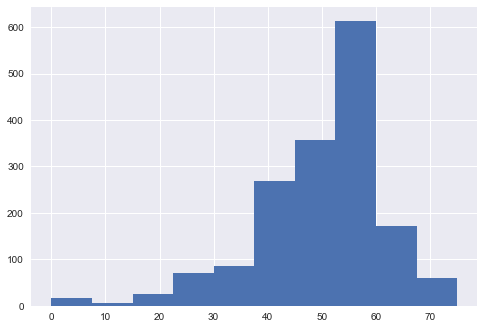

In [14]:
copacabana['Idade'].hist()

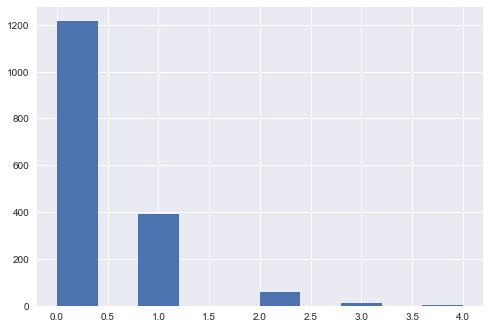

In [15]:
copacabana['Vagas'].hist()

In [16]:
copacabana[copacabana['Idade'] < 20]

,Posicao,Quartos,Vagas,DistPraia,DistFavela,Vu2009,Mes,Idade,Tipologia,AreaConstruida,VAL_UNIT,X,Y
1650,0,2.0,2.0,419,381,2500,842,17.00,1,74,13108,686211.6000,7459102.200
1651,0,2.0,2.0,419,381,2500,554,14.00,1,72,6944,686211.6000,7459102.200
1652,0,2.0,2.0,419,381,2500,484,14.00,1,74,7568,686211.6000,7459102.200
1653,0,1.0,0.0,445,47,800,825,17.00,1,49,5816,685153.1000,7457474.120
1654,0,4.0,3.0,894,189,2300,920,12.00,1,166,13253,685475.4576,7459100.927
1655,1,2.0,2.0,530,436,2450,930,12.00,1,156,13974,686292.3707,7459288.323
1656,1,1.0,0.0,69,693,2700,385,7.00,1,43,6977,685816.0100,7458204.550
1657,1,1.0,0.0,69,693,2700,405,7.00,1,48,3750,685816.0100,7458204.550
1658,0,1.0,0.0,69,693,2700,573,7.00,1,37,7568,685816.0100,7458204.550
1659,0,1.0,0.0,69,693,2700,573,7.00,1,37,6216,685816.0100,7458204.550


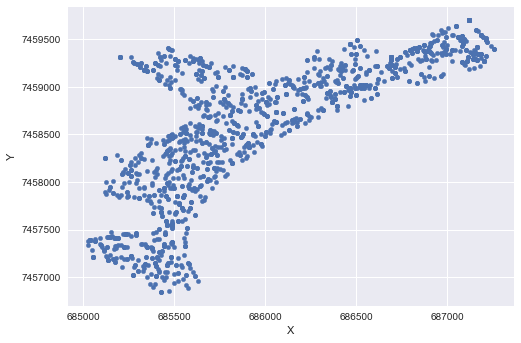

In [17]:
copacabana.plot.scatter('X', 'Y')

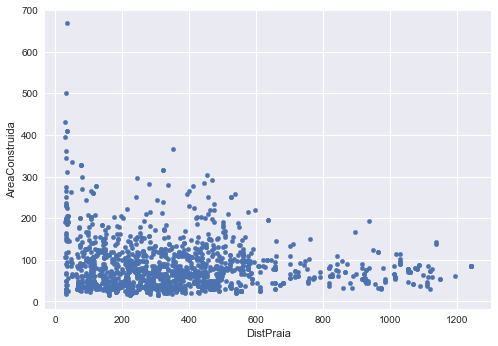

In [18]:
copacabana.plot.scatter('DistPraia', 'AreaConstruida')

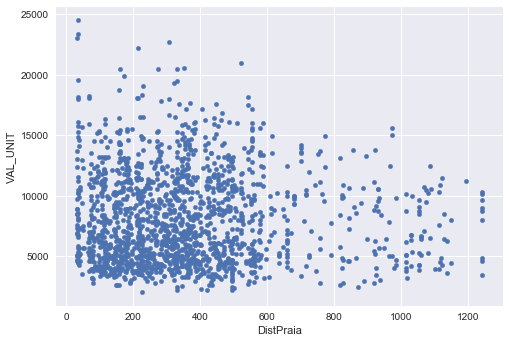

In [19]:
copacabana.plot.scatter('DistPraia', 'VAL_UNIT')

In [20]:
del copacabana['X']
del copacabana['Y']

In [21]:
corr_matrix = np.corrcoef(copacabana.T)

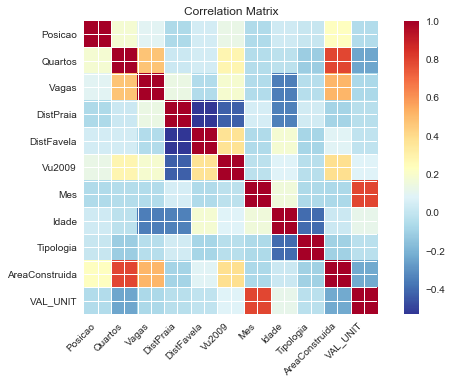

In [23]:
sm.graphics.plot_corr(corr_matrix, xnames=list(copacabana.columns.values))
plt.show()

In [24]:
X = copacabana[
    ['Posicao', 'Quartos', 'Vagas', 'DistPraia', 'Mes', 'Tipologia', 
    'AreaConstruida']
]

In [25]:
X.head()

,Posicao,Quartos,Vagas,DistPraia,Mes,Tipologia,AreaConstruida
0,1,3.0,0.0,311,509,1,95
1,0,2.0,0.0,502,484,1,71
2,0,2.0,0.0,772,920,1,58
3,0,2.0,0.0,428,930,1,88
4,0,2.0,1.0,586,918,1,68


In [26]:
Y = copacabana['VAL_UNIT']

In [27]:
Y.head()

0     4379
1     6479
2    12414
3    11250
4    13382
Name: VAL_UNIT, dtype: int64

In [28]:
X = sm.add_constant(X)

In [29]:
X.head()

,const,Posicao,Quartos,Vagas,DistPraia,Mes,Tipologia,AreaConstruida
0,1.0,1,3.0,0.0,311,509,1,95
1,1.0,0,2.0,0.0,502,484,1,71
2,1.0,0,2.0,0.0,772,920,1,58
3,1.0,0,2.0,0.0,428,930,1,88
4,1.0,0,2.0,1.0,586,918,1,68


In [30]:
model = sm.OLS(Y, X)
results = model.fit()

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               VAL_UNIT   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     503.5
Date:                Thu, 28 Sep 2017   Prob (F-statistic):               0.00
Time:                        10:00:03   Log-Likelihood:                -15206.
No. Observations:                1675   AIC:                         3.043e+04
Df Residuals:                    1667   BIC:                         3.047e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            488.9976    279.529      1.749      0.080     -59.267    1037.263
Posicao          268.2320    109.332      2.453      0.014      53.789     482.675
Quartos         -555.8100     75.431     -7.368      0.000    -703.760    -407.860
Vagas            829.2187    107.087      7.743      0.000     619.180    1039.258
DistPraia         -1.4403      0.223     -6.454      0.000      -1.878      -1.003
Mes               14.3731      0.256     56.099      0.000      13.871      14.876
Tipologia        -19.9310    151.996     -0.131      0.896    -318.054     278.192
AreaConstruida    -7.8577      1.530     -5.137      0.000     -10.858      -4.857
==============================================================================
Omnibus:                      289.234   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.450
Skew:                           0.909   Prob(JB):                    1.68e-171
Kurtosis:                       5.822   Cond. No.                     4.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
results.params

const             488.997648
Posicao           268.231959
Quartos          -555.809990
Vagas             829.218730
DistPraia          -1.440261
Mes                14.373100
Tipologia         -19.931024
AreaConstruida     -7.857715
dtype: float64

In [34]:
predicao = model.predict(results.params, X)
predicao = pd.DataFrame(predicao, columns=['Y_HAT'])

In [36]:
predicao['Y'] = Y

In [37]:
predicao

,Y_HAT,Y
0,5191.372225,4379
1,5033.118117,6479
2,11013.069395,12414
3,11416.518653,11250
4,12002.853285,13382
5,10666.155028,11618
6,9318.932300,6505
7,7627.215263,6410
8,11191.892929,14545
9,12733.645302,11111


In [39]:
X['AreaConstruida'].head()

0    95
1    71
2    58
3    88
4    68
Name: AreaConstruida, dtype: int64

In [42]:
import math
X['AreaConstruida'] = X['AreaConstruida'].apply(math.log)

In [43]:
X['AreaConstruida'].head()

0    4.553877
1    4.262680
2    4.060443
3    4.477337
4    4.219508
Name: AreaConstruida, dtype: float64

In [44]:
model = sm.OLS(Y, X)
results = model.fit()

In [45]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               VAL_UNIT   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     573.6
Date:                Thu, 28 Sep 2017   Prob (F-statistic):               0.00
Time:                        10:11:01   Log-Likelihood:                -15130.
No. Observations:                1675   AIC:                         3.028e+04
Df Residuals:                    1667   BIC:                         3.032e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8812.3436    675.485     13.046      0.000    7487.455    1.01e+04
Posicao          382.4427    104.467      3.661      0.000     177.542     587.343
Quartos          371.7959    101.555      3.661      0.000     172.608     570.984
Vagas           1012.5007    101.054     10.019      0.000     814.295    1210.706
DistPraia         -1.4065      0.209     -6.728      0.000      -1.816      -0.996
Mes               14.3165      0.245     58.466      0.000      13.836      14.797
Tipologia         28.3353    145.290      0.195      0.845    -256.634     313.304
AreaConstruida -2584.8281    189.311    -13.654      0.000   -2956.140   -2213.516
==============================================================================
Omnibus:                      251.715   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.728
Skew:                           0.796   Prob(JB):                    2.78e-150
Kurtosis:                       5.708   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
predicao = model.predict(results.params, X)
predicao = pd.DataFrame(predicao, columns=['Y_HAT'])
predicao['Y'] = Y

In [47]:
predicao.head()

,Y_HAT,Y
0,5417.227560,4379
1,4789.135071,6479
2,11174.147792,12414
3,10723.538086,11250
4,12008.462943,13382


In [48]:
Y = Y.apply(math.log)

In [49]:
model = sm.OLS(Y, X)
results = model.fit()

In [50]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.738   
Dependent Variable: VAL_UNIT         AIC:                -55.3917
Date:               2017-09-28 10:15 BIC:                -12.0032
No. Observations:   1675             Log-Likelihood:     35.696  
Df Model:           7                F-statistic:        674.6   
Df Residuals:       1667             Prob (F-statistic): 0.00    
R-squared:          0.739            Scale:              0.056376
-----------------------------------------------------------------
                  Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-----------------------------------------------------------------
const             8.9036   0.0790 112.7543 0.0000  8.7487  9.0585
Posicao           0.0458   0.0122   3.7523 0.0002  0.0219  0.0698
Quartos           0.0427   0.0119   3.5984 0.0003  0.0194  0.0660
Vagas             0.1276   0.0118  10.8016 0.0000  0.1044  0.1508
DistPraia        -0.0002   0.0000  -6.6829 0.0000 -0.0002 -0.0001
Mes               0.0018   0.0000  63.9774 0.0000  0.0018  0.0019
Tipologia        -0.0117   0.0170  -0.6871 0.4921 -0.0450  0.0216
AreaConstruida   -0.3058   0.0221 -13.8185 0.0000 -0.3492 -0.2624
-----------------------------------------------------------------
Omnibus:               4.147        Durbin-Watson:          1.845
Prob(Omnibus):         0.126        Jarque-Bera (JB):       4.169
Skew:                  -0.088       Prob(JB):               0.124
Kurtosis:              3.170        Condition No.:          10896
=================================================================
* The condition number is large (1e+04). This might indicate
strong multicollinearity or other numerical problems.
"""